# Descriptores para toxicidade ===> indice ToxCast
# planilha simplificada com variaveis selecionadas pelo Pycaret

calculos para a tese



In [ ]:
import sklearn

# **planilha com os descriptores "ToxCast_final3.csv"**

In [ ]:
# carregar matriz geral de dados
import io
import pandas as pd

from google.colab import files

uploaded = files.upload()

# Get the actual filename from the uploaded dictionary keys
filename = list(uploaded.keys())[0]  # Assuming only one file is uploaded

# Use the correct filename to read the CSV
data = pd.read_csv(io.BytesIO(uploaded[filename]), sep=";", decimal=",", header=0, encoding='latin1')

Saving ToxCast_final3.csv to ToxCast_final3.csv


In [ ]:
# matriz
data

,SMILES,ToxCast,MolLogP,MolMR,MinAbsEStateIndex,qed,MinPartialCharge,PEOE_VSA10,PEOE_VSA6,VSA_EState4,VSA_EState5,PEOE_VSA9,BalabanJ
0,OCCOC(=O)C1=CC=CC=C1O,3,0.5413,45.4751,0.790156,0.669395,-0.507053,17.871949,12.084837,-0.990134,-2.630252,17.525054,3.401174
1,C\C=C1\C(=O)C[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C...,31,4.6436,90.8570,2.223343,0.610442,-0.294866,0.000000,25.328961,-14.777817,-21.014521,2.741517,2.667607
2,CC(CC1=CC=CC=C1)NCCCCl,0,2.8361,62.9477,0.964127,0.563849,-0.313884,1.411842,30.212094,-1.377667,-3.560619,6.853793,4.052170
3,Cl.COC1=CC2=NC(=NC(N)=C2C=C1OC)N1CCN(CC1)C(=O)...,3,1.4786,112.0694,0.464390,0.788239,-0.492842,13.070579,0.000000,-1.584764,-8.026404,45.637018,0.000004
4,ClC1CC2C(C1Cl)C1(Cl)C(Cl)=C(Cl)C2(Cl)C1(Cl)Cl,35,5.6828,81.2160,0.535972,0.451292,-0.121375,9.748345,46.403760,0.000000,-5.924491,20.770852,2.609028
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8740,CCCCCCCCNC,0,2.5663,47.3027,0.986281,0.540038,-0.319752,1.411842,38.716517,0.000000,0.000000,0.000000,6.838900
8741,CCC1=CC(=C(O)C(=C1)C(C)(C)C)C(C)(C)C,16,4.5496,74.8848,1.969861,0.755501,-0.507341,5.749512,60.048082,-15.292707,-2.090887,2.741517,5.400308
8742,OC(=O)C1=CC=CC(Cl)=C1Cl,0,2.6916,43.4213,0.307346,0.740184,-0.477600,0.000000,29.244298,-0.474383,-1.180185,19.720994,3.595121
8743,ClCC=CCl,0,1.9777,25.7130,0.671296,0.453516,-0.122165,0.000000,17.653012,-0.671296,-2.320602,2.741517,4.399516


**Removendo linhas onde não foi feito o calculo do descriptor (referencia coluna = MinPartialCharge)**

In [ ]:
df_remove = data.loc[data['MinPartialCharge'].isnull()]
data2 = data.drop(df_remove.index)
len(data2)

8666

In [ ]:
 X = data2.drop(['SMILES',	'ToxCast'], axis=1)

In [ ]:
print(X.shape)

(8666, 11)


In [ ]:
# autoescalonamento da matriz de entrada

import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True, with_std=True)
X2 = pd.DataFrame(scaler.fit_transform(X))

In [ ]:
saida = data2['ToxCast']   #separando a saida do modelo dos dados originais

In [ ]:
X2

,0,1,2,3,4,5,6,7,8,9,10
0,-0.567071,-0.651168,-0.137722,0.724383,-0.516316,1.038025,-0.506209,0.455821,0.249987,-0.046371,0.141007
1,0.939572,0.426875,1.369947,0.418750,0.813229,-0.666393,0.041747,-1.914780,-2.048728,-0.915184,-0.205486
2,0.275735,-0.236108,0.045291,0.177194,0.694064,-0.531748,0.243780,0.389190,0.133656,-0.673510,0.448499
3,-0.222831,0.930774,-0.480418,1.340518,-0.427273,0.580126,-1.006202,0.353583,-0.424732,1.605740,-1.465501
4,1.321236,0.197854,-0.405115,-0.406345,1.900309,0.263290,0.913687,0.626061,-0.161915,0.144381,-0.233155
...,...,...,...,...,...,...,...,...,...,...,...
8661,0.176646,-0.607753,0.068596,0.053748,0.657294,-0.531748,0.595638,0.626061,0.578865,-1.076300,1.764783
8662,0.905048,0.047457,1.103292,1.170789,-0.518120,-0.118072,1.478201,-2.003309,0.317427,-0.915184,1.085278
8663,0.222665,-0.699955,-0.645623,1.091382,-0.331768,-0.666393,0.203739,0.544497,0.431299,0.082682,0.232616
8664,-0.039527,-1.120614,-0.262758,-0.394817,1.895357,-0.666393,-0.275834,0.510641,0.288704,-0.915184,0.612564


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, saida, test_size=0.25, random_state=13)

# Modelo Extra Tree Regressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
modelo = ExtraTreesRegressor(n_estimators=100, min_samples_leaf=5, random_state=13).fit(X_train, y_train)

In [ ]:
# calculo de previsão

ypred = modelo.predict(X_test)

ypredc = modelo.predict(X_train)

# Avaliação

In [ ]:
from sklearn.metrics import mean_squared_error
import math

mset = mean_squared_error(y_test, ypred)
rmset = math.sqrt(mset)

print("The mean squared error (MSE) on test set: {:.4f}".format(mset))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmset))

msec = mean_squared_error(y_train, ypredc)
rmsec = math.sqrt(msec)
print('\n')
print("The mean squared error (MSE) on training set: {:.4f}".format(msec))
print("The root mean squared error (RMSE) on training set: {:.4f}".format(rmsec))

The mean squared error (MSE) on test set: 96.0747
The root mean squared error (RMSE) on test set: 9.8018


The mean squared error (MSE) on training set: 47.4799
The root mean squared error (RMSE) on training set: 6.8906


In [ ]:
from sklearn.metrics import r2_score
# avaliação do conj teste
test_r2 = r2_score(y_test, ypred)
print('Reg linear coef R2 (teste): ', test_r2)

Reg linear coef R2 (teste):  0.392071575488007


In [ ]:
# avaliação do conj calibração
cal_r2 = r2_score(y_train, ypredc)
print('Reg linear coef R2 (calibração): ', cal_r2)

Reg linear coef R2 (calibração):  0.6948139964300034


Text(0.5, 0, 'y experimental')

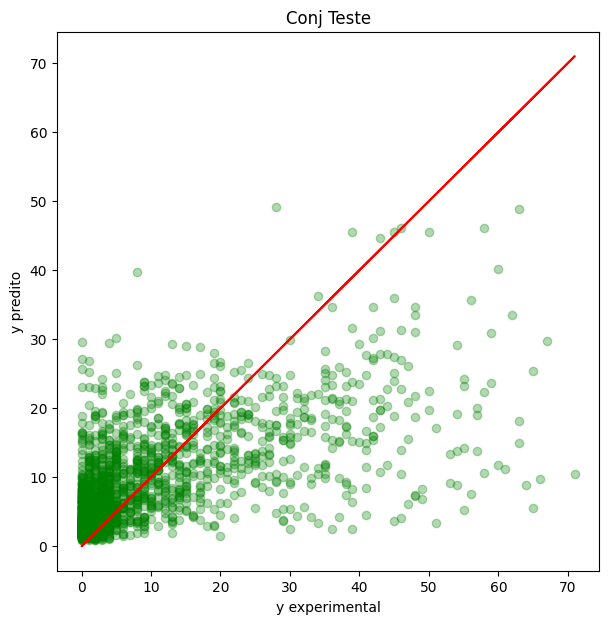

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(7, 7))  # tamanho do gráfico
plt.scatter(x=y_test, y=ypred, c='green' ,alpha=0.3) # dispersão dos dados

z = np.polyfit(y_test, y_test, 1)  #linha vermelha de referência - parte 1
p = np.poly1d(z)  # equação da linha - parte 2

plt.plot(y_test, p(y_test), 'red')  # cor da linha e geraçao da mesma
plt.title('Conj Teste')
plt.ylabel('y predito')
plt.xlabel('y experimental')

Text(0.5, 0, 'y experimental')

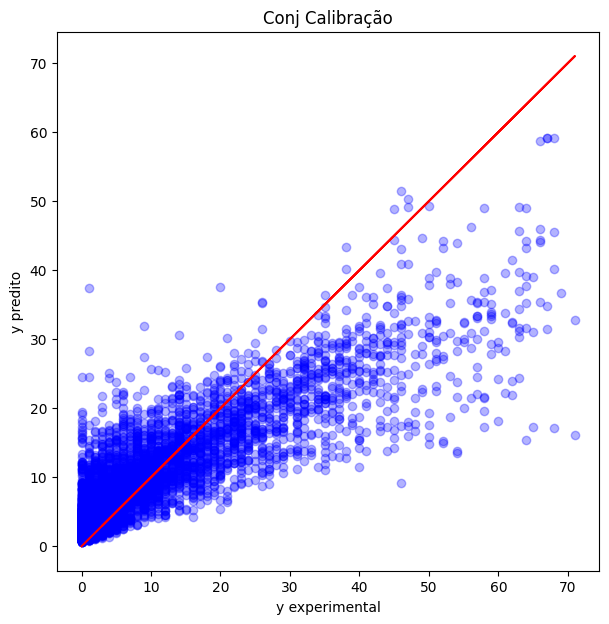

In [ ]:
plt.figure(figsize=(7, 7))  # tamanho do gráfico
plt.scatter(x=y_train, y=ypredc, c='blue' ,alpha=0.3) # dispersão dos dados

z = np.polyfit(y_train, y_train, 1)  #linha vermelha de referência - parte 1
p = np.poly1d(z)  # equação da linha - parte 2

plt.plot(y_train, p(y_train), 'red')  # cor da linha e geraçao da mesma
plt.title('Conj Calibração')
plt.ylabel('y predito')
plt.xlabel('y experimental')

# modelo usando scores do PCA como dados de entrada

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 8)  # 8 componentes
pca.fit(X2)
scores = pca.transform(X2)   # scores

In [ ]:
# variancia acumulada para cada PC em %
import numpy as np
ss = np.cumsum(pca.explained_variance_ratio_)
print(ss*100)

[29.59696249 49.17835796 61.94772702 70.83464154 77.42228861 83.7442812
 88.80804009 92.88080549]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scores, saida, test_size=0.25, random_state=13)

In [ ]:
modelo = ExtraTreesRegressor(n_estimators=100, min_samples_leaf=5, random_state=13).fit(X_train, y_train)

In [ ]:
# calculo da previsão

ypred = modelo.predict(X_test)

ypredc = modelo.predict(X_train)

# Avaliação

In [ ]:
mset = mean_squared_error(y_test, ypred)
rmset = math.sqrt(mset)

print("The mean squared error (MSE) on test set: {:.4f}".format(mset))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmset))

msec = mean_squared_error(y_train, ypredc)
rmsec = math.sqrt(msec)
print('\n')
print("The mean squared error (MSE) on training set: {:.4f}".format(msec))
print("The root mean squared error (RMSE) on training set: {:.4f}".format(rmsec))

The mean squared error (MSE) on test set: 109.1516
The root mean squared error (RMSE) on test set: 10.4476


The mean squared error (MSE) on training set: 59.4787
The root mean squared error (RMSE) on training set: 7.7122


In [ ]:
# avaliação do conj teste
test_r2 = r2_score(y_test, ypred)
print('Reg linear coef R2 (teste): ', test_r2)

# avaliação do conj calibração
cal_r2 = r2_score(y_train, ypredc)
print('Reg linear coef R2 (calibração): ', cal_r2)

Reg linear coef R2 (teste):  0.3093250522180948
Reg linear coef R2 (calibração):  0.6176897464966742
